In [1]:
import matplotlib.pyplot as plt
import numpy as np

import imutils

from skimage.transform import iradon, radon
from skimage.data import shepp_logan_phantom

In [32]:
def concat(Ir, Ig, Ib):
    res = np.concatenate((
        Ir.reshape((*Ir.shape,1)), 
        Ig.reshape((*Ig.shape,1)),
        Ib.reshape((*Ib.shape,1))
    ), axis=2)
    
    return res


def myRadon(I, nTheta):
    
    sino = np.zeros((I.shape[0],nTheta))

    for theta, i in zip(np.linspace(0,-180,nTheta), range(nTheta)):
        IR = imutils.rotate(I,angle=theta)
        sino[:,i] = np.sum(IR,axis=0)

    return sino/(I.shape[0]*I.shape[1])

def reshape(I):
    if I.shape[0]>I.shape[1]:
        dif = I.shape[0]-I.shape[1]
        I = I[dif//2:-dif//2,:]    
    else:
        dif = I.shape[1]-I.shape[0]
        I = I[:dif//2:-dif//2]            
    
    return I

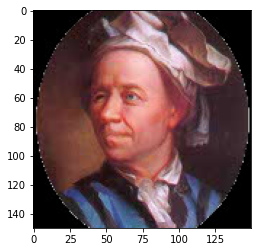

In [39]:
I = shepp_logan_phantom()
I = plt.imread('euler_portrait.jpg')

I = reshape(I)

Ir = I[:,:,0]
Ig = I[:,:,1]
Ib = I[:,:,2]

plt.imshow(I)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


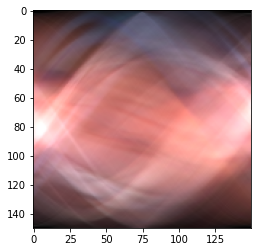

In [40]:
nTheta = Ir.shape[1]

sinoR = myRadon(Ir, nTheta)
sinoG = myRadon(Ig, nTheta)
sinoB = myRadon(Ib, nTheta)

sino = concat(sinoR, sinoG, sinoB)


plt.imshow(sino)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


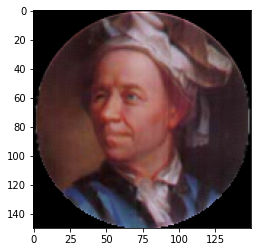

In [41]:
IHatR = iradon(sinoR)
IHatG = iradon(sinoG)
IHatB = iradon(sinoB)

IHat = concat(IHatR, IHatG, IHatB)
IHat /= np.max(IHat)


plt.imshow(IHat)